# PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving as much variance as possible. It is widely used for data visualization, noise reduction, and feature extraction.

### Key Concepts of PCA

1. Variance: PCA aims to preserve the maximum variance in the data when projecting it onto a lower-dimensional space.

2. Principal Components: These are the directions (vectors) in the data that maximize variance. The first principal component captures the most variance, the second captures the second most, and so on.

3. Eigenvalues and Eigenvectors: PCA uses eigenvalues and eigenvectors of the covariance matrix of the data to determine the principal components.

4. Dimensionality Reduction: By selecting the top k principal components, we can reduce the dimensionality of the data from n to k.

### Pseudo Code

1. Standardize the dataset:
   - Subtract the mean from each feature.
   - Divide by the standard deviation of each feature.

2. Compute the covariance matrix of the standardized data.

3. Compute the eigenvalues and eigenvectors of the covariance matrix.

4. Sort the eigenvalues in descending order and arrange the corresponding eigenvectors.

5. Select the top k eigenvectors (principal components).

6. Transform the original data by projecting it onto the selected principal components.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components  # Number of principal components to keep
        self.components = None  # Principal components
        self.mean = None  # Mean of the data
        self.std = None  # Standard deviation of the data

    def fit(self, X):
        """
        Fit the PCA model to the data.
        
        Parameters:
        X (numpy array): Input data of shape (n_samples, n_features).
        """
        # Step 1: Standardize the data
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        X_std = (X - self.mean) / self.std

        # Step 2: Compute the covariance matrix
        cov_matrix = np.cov(X_std, rowvar=False)

        # Step 3: Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Step 4: Sort eigenvalues and eigenvectors
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]

        # Step 5: Select the top k eigenvectors (principal components)
        self.components = sorted_eigenvectors[:, :self.n_components]

    def transform(self, X):
        """
        Transform the data using the fitted PCA model.
        
        Parameters:
        X (numpy array): Input data of shape (n_samples, n_features).
        
        Returns:
        numpy array: Transformed data of shape (n_samples, n_components).
        """
        # Standardize the data
        X_std = (X - self.mean) / self.std

        # Step 6: Project the data onto the principal components
        return np.dot(X_std, self.components)

# Load the Wine dataset
data = load_wine()
X = data.data  # Features (13-dimensional)
y = data.target  # Labels (3 classes)


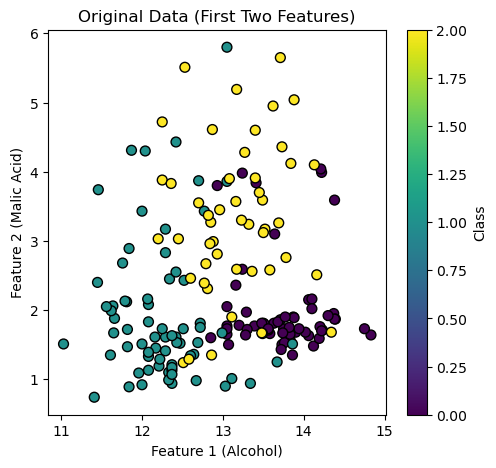

In [4]:
# Visualize the original data (using the first two features)
plt.figure(figsize=(12, 5))

# Plot original data
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolor="k", s=50)
plt.xlabel("Feature 1 (Alcohol)")
plt.ylabel("Feature 2 (Malic Acid)")
plt.title("Original Data (First Two Features)")
plt.colorbar(label="Class")

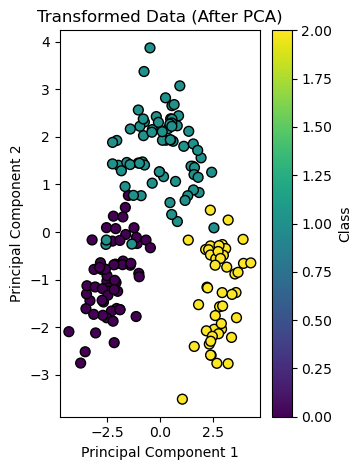

In [5]:
# Initialize and fit the PCA model
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data
X_transformed = pca.transform(X)

# Plot transformed data
plt.subplot(1, 2, 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap="viridis", edgecolor="k", s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Transformed Data (After PCA)")
plt.colorbar(label="Class")

plt.tight_layout()
plt.show()